In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stocks_in_thailand = pd.read_csv("stock-list-thailand.csv")
stocks_in_thailand["yf_name"] = stocks_in_thailand["Symbol"] + ".BK"
stocks_in_thailand

,Symbol,Company Name,Market,Industry Group,Sector,Unnamed: 5,yf_name
0,24CS,Twenty-Four Con & Supply Public Company Limited,mai,PROPCON,-,NaN,24CS.BK
1,2S,2S METAL PUBLIC COMPANY LIMITED,SET,INDUS,STEEL,NaN,2S.BK
2,3K-BAT,THAI ENERGY STORAGE TECHNOLOGY PUBLIC COMPANY ...,SET,INDUS,AUTO,NaN,3K-BAT.BK
3,7UP,SEVEN UTILITIES AND POWER PUBLIC COMPANY LIMITED,SET,RESOURC,ENERG,NaN,7UP.BK
4,A,AREEYA PROPERTY PUBLIC COMPANY LIMITED,SET,PROPCON,PROP,NaN,A.BK
...,...,...,...,...,...,...,...
275,GROREIT,GRANDE ROYAL ORCHID HOSPITALITY REAL ESTATE IN...,SET,PROPCON,PF&REIT,NaN,GROREIT.BK
276,GSC,GLOBAL SERVICE CENTER PUBLIC COMPANY LIMITED,mai,SERVICE,-,NaN,GSC.BK
277,GSTEEL,G STEEL PUBLIC COMPANY LIMITED,SET,INDUS,STEEL,NaN,GSTEEL.BK
278,GTB,GETABEC PUBLIC COMPANY LIMITED,mai,INDUS,-,NaN,GTB.BK


In [3]:
stocks_in_thailand["yf_name"]

0         24CS.BK
1           2S.BK
2       3K-BAT.BK
3          7UP.BK
4            A.BK
          ...    
275    GROREIT.BK
276        GSC.BK
277     GSTEEL.BK
278        GTB.BK
279        GTV.BK
Name: yf_name, Length: 280, dtype: object

# Historical

In [4]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [21]:
stock = yf.Ticker('AAPL')
df = stock.history('3mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-10 00:00:00-04:00,172.781019,173.789619,171.662556,173.320267,53724500,0.00,0.0
2023-05-11 00:00:00-04:00,173.609878,174.348846,171.932190,173.510010,49514700,0.00,0.0
2023-05-12 00:00:00-04:00,173.619995,174.059998,171.000000,172.570007,45497800,0.24,0.0
2023-05-15 00:00:00-04:00,173.160004,173.210007,171.470001,172.070007,37266700,0.00,0.0
2023-05-16 00:00:00-04:00,171.990005,173.139999,171.800003,172.070007,42110300,0.00,0.0
...,...,...,...,...,...,...,...
2023-08-03 00:00:00-04:00,191.570007,192.369995,190.690002,191.169998,61235200,0.00,0.0
2023-08-04 00:00:00-04:00,185.520004,187.380005,181.919998,181.990005,115799700,0.00,0.0
2023-08-07 00:00:00-04:00,182.130005,183.130005,177.350006,178.850006,97576100,0.00,0.0


In [23]:
def create_historical_df(yf_name):   #input as string
    stock = yf.Ticker(yf_name)
    df = stock.history('3mo')
    df_exp = df[['Close']]
    return df_exp

historical_df = create_historical_df('PTT.BK')    
historical_df

,Close
Date,
2023-05-10 00:00:00+07:00,32.00
2023-05-11 00:00:00+07:00,32.25
2023-05-12 00:00:00+07:00,32.25
2023-05-15 00:00:00+07:00,32.25
2023-05-16 00:00:00+07:00,32.25
...,...
2023-08-04 00:00:00+07:00,34.75
2023-08-07 00:00:00+07:00,34.75
2023-08-08 00:00:00+07:00,34.75


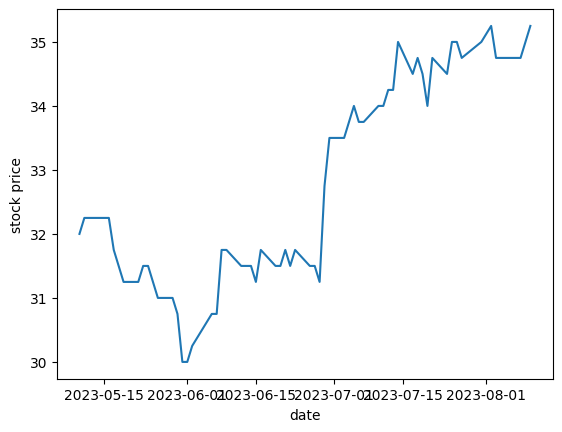

In [24]:
#plot stock data
plt.plot(historical_df.index, historical_df['Close'])
plt.ylabel('stock price')
plt.xlabel('date')


plt.show()

In [7]:
# h_df.iloc[0:5]

In [27]:
# add sd column to df (calcuate from +-2 data of the Close price)
# return mean vaue of all sd 
def average_sd(df):
    sd_arr = []
    print('shape :', df.shape[0])
    for i in range(df.shape[0]):
        if i+7 < df.shape[0]:
            day_df = df.iloc[i-7:i+7]
            sd = day_df['Close'].std()
        else :
            sd = np.nan
        # print(i,sd)
        sd_arr.append(sd)
    df['sd'] = sd_arr
    mean_sd = df['sd'].mean()
    # return sd_df, mean_sd_df
    return mean_sd

mean_sd = average_sd(historical_df)
# h_df.iloc[30:40]
mean_sd

shape : 64


0.5875781639784406

In [32]:
historical_df.dropna()

,Close,sd
Date,,
2023-05-19 00:00:00+07:00,31.25,0.477516
2023-05-22 00:00:00+07:00,31.25,0.520526
2023-05-23 00:00:00+07:00,31.50,0.625686
2023-05-24 00:00:00+07:00,31.50,0.675564
2023-05-25 00:00:00+07:00,31.25,0.654916
2023-05-26 00:00:00+07:00,31.00,0.567249
2023-05-29 00:00:00+07:00,31.00,0.524470
2023-05-30 00:00:00+07:00,30.75,0.549725
2023-05-31 00:00:00+07:00,30.00,0.587180


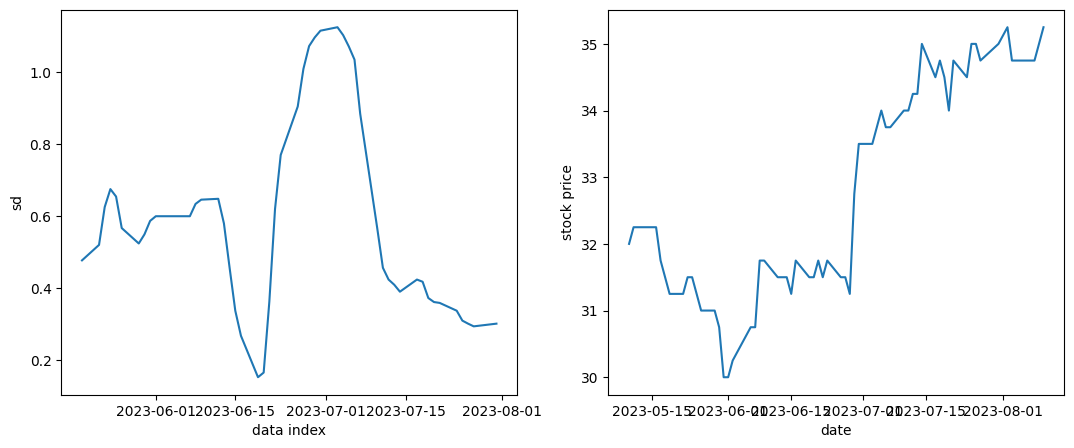

In [28]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.plot(historical_df.index, historical_df['sd'])
plt.ylabel('sd')
plt.xlabel('data index')

plt.subplot(132)
plt.plot(historical_df.index, historical_df['Close'])
plt.ylabel('stock price')
plt.xlabel('date')

plt.show()



/Users/tanyatonoranrigsupak/Documents/intern-project/venv-intern-project/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


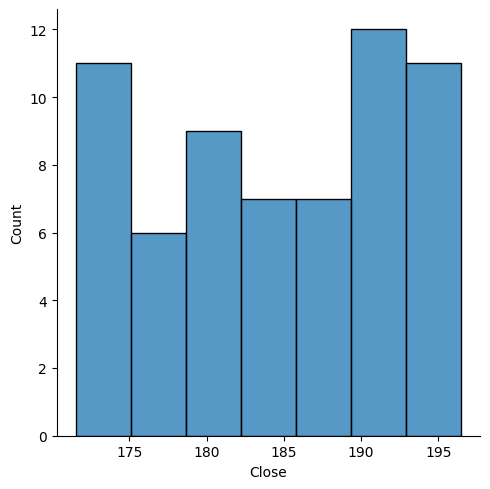

In [10]:
import seaborn as sns
sns.displot( historical_df['Close'])

In [11]:
mean_stock_price = historical_df["Close"].mean()
mean_stock_price

184.4981004018632

In [12]:
# cal culate sd as percentage of mean stockprice
mean_sd_percent = mean_sd/mean_stock_price * 100
mean_sd_percent

1.4813023760561397

In [13]:
def risk_level(mean_sd_percent):
    if   0.0 < mean_sd_percent <= 1.0:
        risk = 1
    elif 1.0 < mean_sd_percent <= 2.0:
        risk = 2
    elif 2.0 < mean_sd_percent <= 3.0:
        risk = 3
    elif 3.0 < mean_sd_percent <= 4.0:
        risk = 4
    elif 4.0 < mean_sd_percent <= 5.0:
        risk = 5
    elif 6.0 < mean_sd_percent <= 7.0:
        risk = 6
    else:
        risk = 7
    return risk

# -------- Main ---------

In [14]:
# stocks_in_thailand["yf_name"].head(10)

In [15]:
stock_name = "AAPL"

In [16]:
h_df = create_historical_df(stock_name)
mean_sd = average_sd(h_df)
mean_stock_price = h_df["Close"].mean()
mean_sd_percent = mean_sd/mean_stock_price * 100
print(mean_stock_price)
print(mean_sd)
print('percent-',mean_sd_percent)
risk = risk_level(mean_sd_percent)
print('-----risk ', risk)

shape : 63
184.4981004018632
2.732974745031242
percent- 1.4813023760561397
-----risk  2
